##로지스틱 회귀 실습

##03. 데이터 준비하기

In [ ]:
# 사용할 데이터를 불러와서 저장하기

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

In [ ]:
#데이터 확인해보기

#저장했던 변수명을 그대로 쓰기
fish

In [39]:
#출력문의 형태로 보기
print(fish)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


In [ ]:
#생선의 종류를 보고 싶다
#특정한 columes에 대해서 나올 수 있는 index값 목록을 보고 싶다.
print(pd.unique(fish['Species']))

In [ ]:
#생선의 종류가 몇 가지인지 구한다
fish_num=pd.unique(fish['Species']) #생선의 index값 목록을 fish_num으로 저장
len(fish_num) #원소의 개수를 구한다

In [ ]:
fish_num

In [7]:
#생선의 종류 : 타깃(target)
#나머지 값 : 입력데이터(input)
#데이터 프레임에서 5개의 열을 선택하고 이를 fish_input이라는 이름으로 저장
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
print(fish_input[:5]) #5개 행만 출력

In [ ]:
fish_input #전체보기

In [42]:
#생선의 타깃데이터를 생성해서 데이터 프레임 형식으로 저장
#데이터 프레임으로 저장하기 위해서 to_numpy 입력
fish_target = fish['Species'].to_numpy()

In [ ]:
#저장된 데이터 프레임 확인하기
fish_target

**[과제 1번째]**

In [12]:
#데이터를 학습할 것과 테스트 할 것으로 쪼갭니다.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

#strarify=> "'Species'"

#random_state 명령어를 치는 이유는 무엇일까요? (과제)

In [ ]:
#1단계 -> 여기 저장된 데이터(생선의 특성)을 가지고 생선 종류를 예측하는 학습모형을 만듭니다.
train_input

In [ ]:
#1단계 -> 여기 저장된 데이터(생선의 특성)을 가지고 생선 종류를 예측하는 학습모형을 만듭니다.
train_target

In [ ]:
#2단계 -> 이제 테스트 검증용 데이터(생선의 특성)을 가지고, 우리가 분류한 모델을 넣어서 생선의 종류를 예측합니다.
train_input

In [46]:
#데이터를 표준화 시켜서 전처리 합니다.
#훈련 데이터 세트 / 테스트(검증)데이터 세트 모두 변환합니다.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input,train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
test_target

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [ ]:
kn.fit(train_scaled, train_target)

In [21]:
kn.score(train_scaled, train_target)

0.7983193277310925

In [22]:
kn.score(test_scaled, test_target)

0.85

In [23]:
test_input

array([[7.80000e+01, 1.87000e+01, 1.94000e+01, 5.19920e+00, 3.12340e+00],
       [1.34000e+01, 1.24000e+01, 1.35000e+01, 2.43000e+00, 1.26900e+00],
       [2.00000e+02, 3.23000e+01, 3.48000e+01, 5.56800e+00, 3.37560e+00],
       [2.70000e+02, 2.60000e+01, 2.87000e+01, 8.38040e+00, 4.24760e+00],
       [1.50000e+02, 2.30000e+01, 2.45000e+01, 5.21850e+00, 3.62600e+00],
       [1.00000e+03, 3.70000e+01, 4.26000e+01, 1.89570e+01, 6.60300e+00],
       [7.00000e+00, 1.06000e+01, 1.16000e+01, 1.72840e+00, 1.14840e+00],
       [1.80000e+02, 2.52000e+01, 2.79000e+01, 7.08660e+00, 3.90600e+00],
       [1.88000e+02, 2.46000e+01, 2.62000e+01, 6.73340e+00, 4.16580e+00],
       [1.25000e+03, 5.60000e+01, 5.97000e+01, 1.06863e+01, 6.98490e+00],
       [6.50000e+02, 3.35000e+01, 3.87000e+01, 1.44738e+01, 5.72760e+00],
       [1.00000e+03, 4.00000e+01, 4.35000e+01, 1.23540e+01, 6.52500e+00],
       [6.00000e+02, 3.20000e+01, 3.72000e+01, 1.54380e+01, 5.58000e+00],
       [1.50000e+02, 2.00000e+01, 2.24

##04. k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#최근접 이웃의 개수를 3개로 지정해서 맞추기
#개수를 5, 7, 9로 해서 확률을 비교해보세요
kn = KNeighborsClassifier(n_neighbors=3)
# 가능하면 홀수(3,5,7...) -> 실제로 5, 7, 9
kn.fit(train_scaled, train_target)

#훈련용 데이터 세트의 정확도
print(kn.score(train_scaled, train_target))

#테스트(검즘용) 데이터 세트의 정확도
print(kn.score(test_scaled, test_target))

In [ ]:
# 사이킷런에 저장된 인덱스 값

print(kn.classes_)

In [ ]:
# 참고 원래 순서
pd.unique(fish['Species'])

In [ ]:
#5개 테스트(검증용) 샘플(5개)의 타깃값을 예측함
print(kn.predict(test_scaled[:5]))

In [ ]:
print(test_target[:5])
#5개의 테스트(검증용) 실제 값
#4번째가 whitefish로 예측한 값은 perch임

**[과제 2]**

In [ ]:
#물고기 예측의 과정을 본다
import numpy as np

#7개의 고유 값에 해당할 확률을 계산해서 가장 가깝게 예측
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

# (과제) 질문 왜 3개만 나올까요?

In [ ]:
#위에 7개 행렬에 각 칼럼(인덱스) 값은 무엇일까요?
print(kn.classes_)

In [ ]:
#4번째 샘플의 최근접 이웃의 클래스를 알아봅니다.
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

이 샘플의 이웃 : Roach가 1개, Perch가 2개
그런다면 Roach확률이 1/3이고 Rerch가 2/3입니다. 따라서 확률은 33% 66%라고 할 수 있습니다.

## 05. 로지스틱 회귀

In [ ]:
#numpy를 이용해서 시그모이드 함수 만들기

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

##06. 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
#블리언 인덱싱(Boolean Indexing -> True/False 값을 전달해 행을 선택)

#A부터 E까지 있는 값 중에서 TRUE가 있는 값만 골라낸다.
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

In [34]:
#도미와 빙어를 골라내는 훈련세트에 적용

#==로 도미와 빙어에 대한 행만 골라냄
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀 모형
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

In [ ]:
#처음 5개의 샘플만 예측
print(lr.predict(train_bream_smelt[:5]))

In [ ]:
#예측 확률을 보여줌
print(lr.predict_proba(train_bream_smelt[:5]))

In [ ]:
#행렬의 컬럼 값에 대응되는 부분
print(lr.classes_)

In [ ]:
#회귀모형의 계수
# z= a * weight + b * Length + c * Diagonal + d * Height + e * width + f
print(lr.coef_, lr.intercept_)

In [ ]:
#각 모형의 z값을 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

In [ ]:
#확률을 계산
from scipy.special import expit

print(expit(decisions))

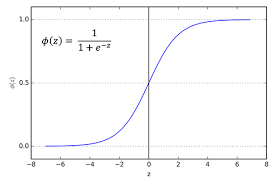

##07.  로지스틱 회귀로 다중 분류 수행하기

In [53]:
lr = LogisticRegression(C=100, max_iter=100000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#C값과 ITERATION 값을 바꿔서 정확도를 계산

0.9831932773109243
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

In [ ]:
#5개 샘플에 대한 예측확률을 계산
#그런데 왜 7개 행이 계산?

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

In [ ]:
print(lr.classes_)

In [ ]:
#다중 분류의 선형방정식을 출력함
#5개의 특성을 사용해서 7개의 생선의 확률을 예측함
print(lr.coef_.shape, lr.intercept_.shape)

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

In [ ]:
#시그모이드 함수 : 하나의 선형 방정식의 출력 값을 0~1사이로 압축함
# softmax함수 : 여러개의 선행 방정식의 출력 값을 0~1사이로 압축하고 전체 합이 1이 되도록함
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

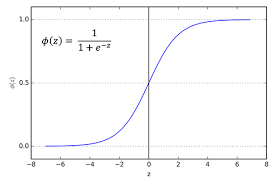